In [112]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df_clean_data = pd.read_csv(r'C:\Users\Agustín\Desktop\4Geeks\Clases\30. Proyecto Final\Polar WebApp\PolarWeb\export.csv')

In [114]:
df_clean_data.head()

,Unnamed: 0,Date,Tweet,Tweet_Likes,Sentiment
0,0,Tue Oct 15 17:33:20 +0000 2024,Milan Marseille Montpellier\n\nLive Code\n\n▬A...,0,Positive
1,1,Tue Oct 15 17:33:19 +0000 2024,@resul_fcb Messi 🍇d me when I was 14,0,Positive
2,2,Tue Oct 15 17:33:19 +0000 2024,"@cervovski Sorry, but Vlady was a wimp. Now, g...",0,Negative
3,3,Tue Oct 15 17:33:19 +0000 2024,@Mariapilar1397 You're going to have him for 7...,0,Negative
4,4,Tue Oct 15 17:33:18 +0000 2024,@ActuFoot_ Messi and Neymar were so right,0,Negative


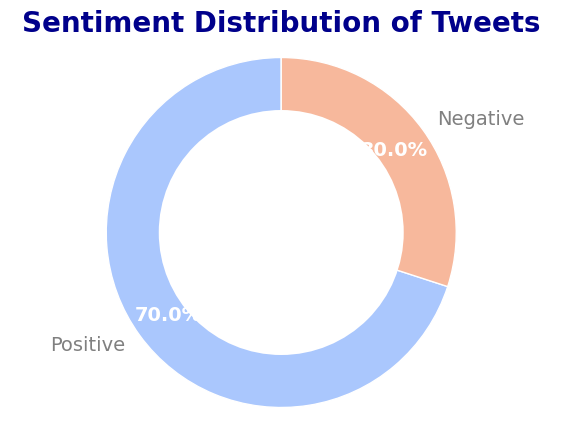

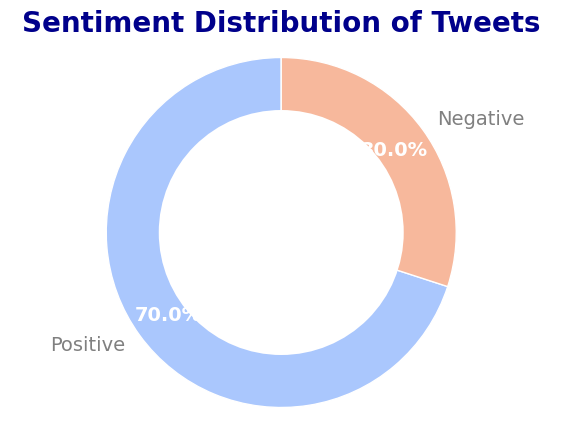

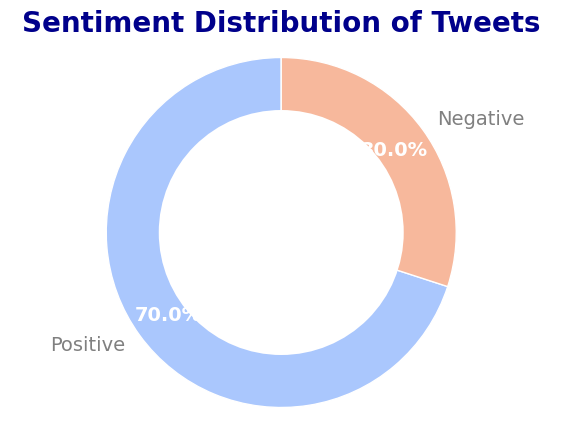

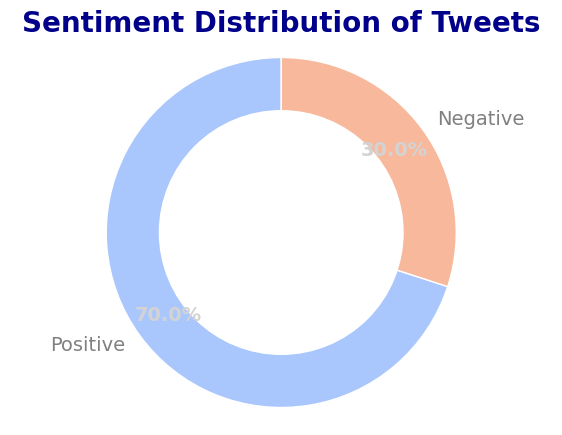

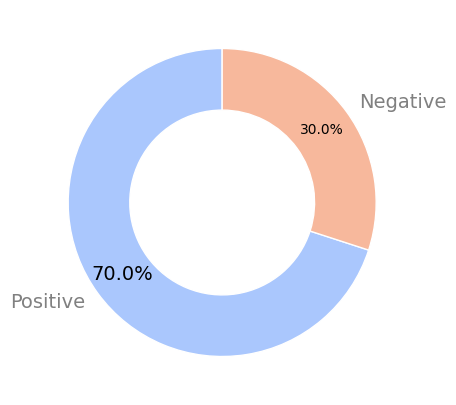

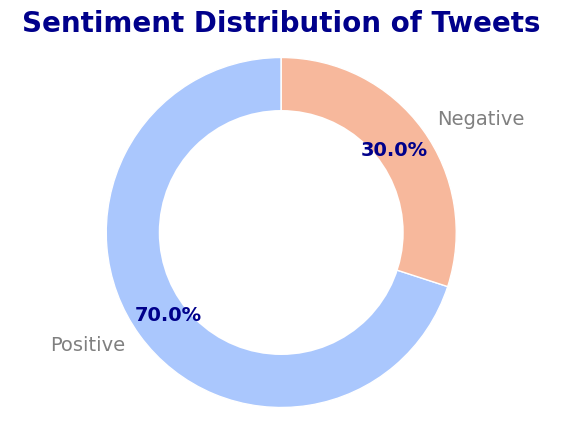

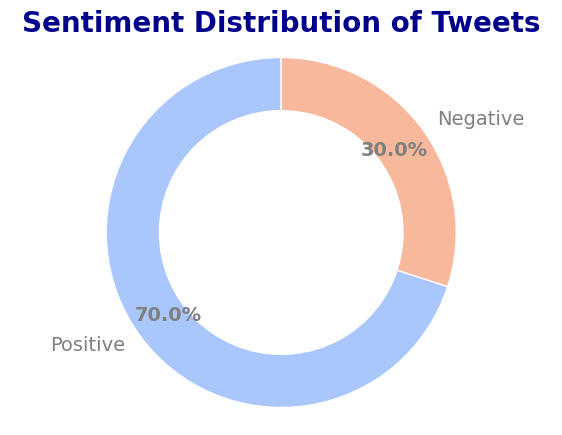

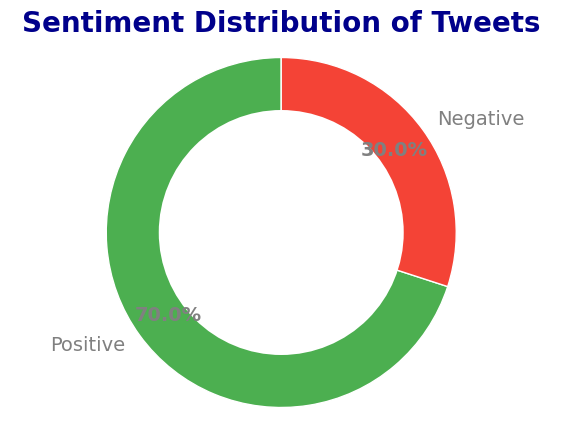

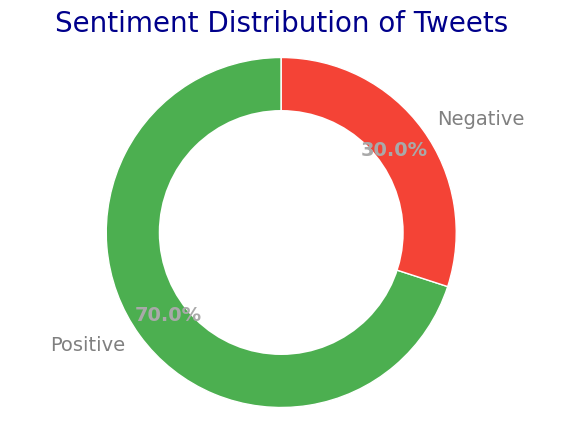

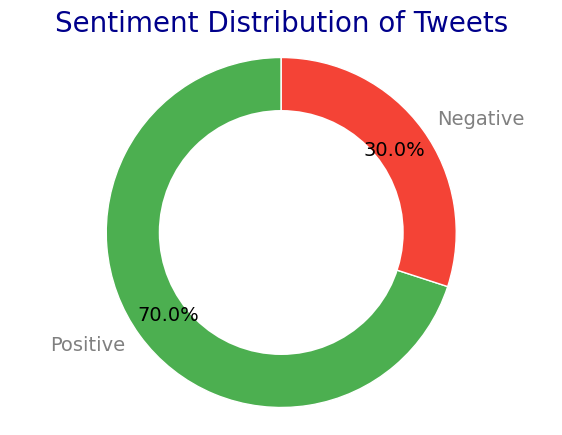

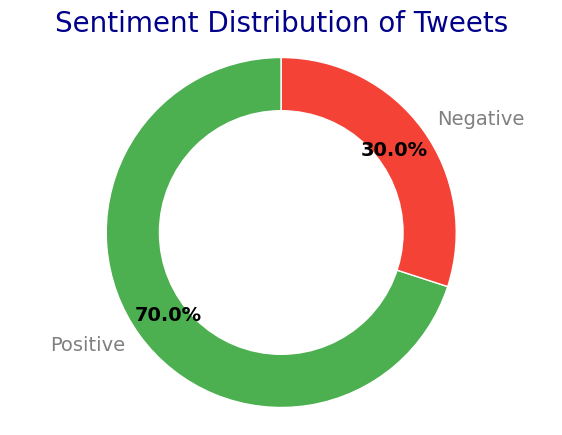

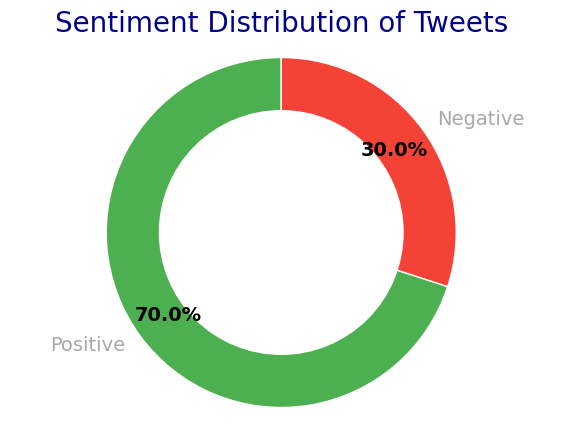

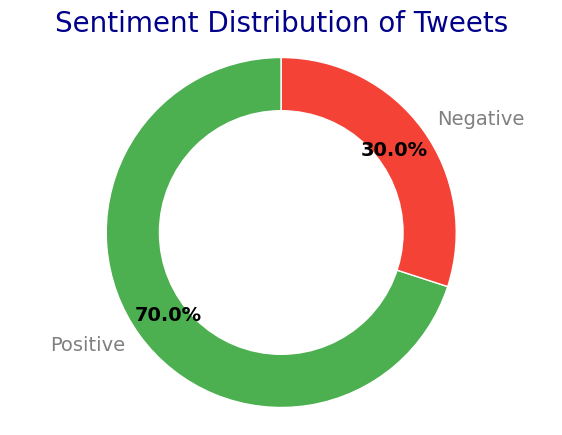

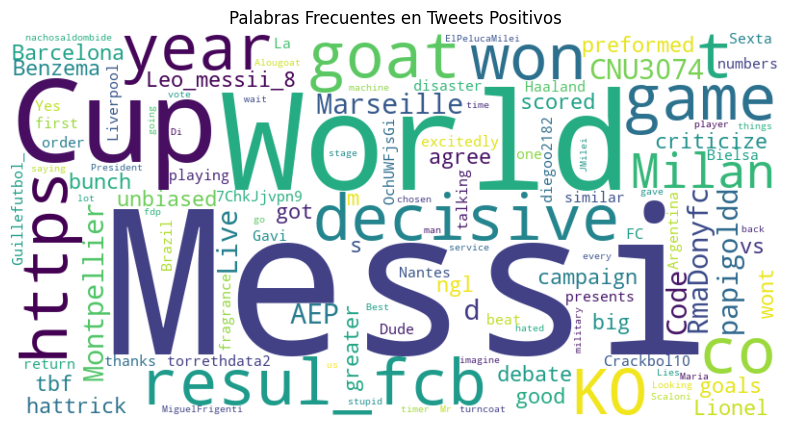

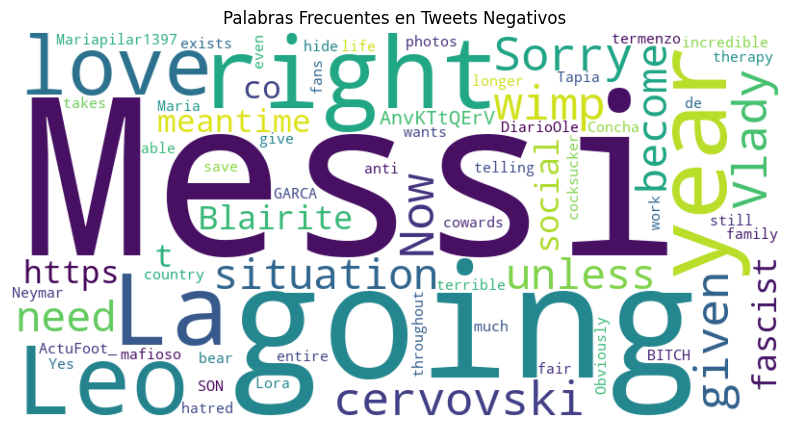

In [115]:
from wordcloud import WordCloud

# WordCloud para tweets positivos
positive_tweets = ' '.join(df_clean_data[df_clean_data['Sentiment'] == 'Positive']['Tweet'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Frecuentes en Tweets Positivos')
plt.show()

# WordCloud para tweets negativos
negative_tweets = ' '.join(df_clean_data[df_clean_data['Sentiment'] == 'Negative']['Tweet'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Frecuentes en Tweets Negativos')
plt.show()

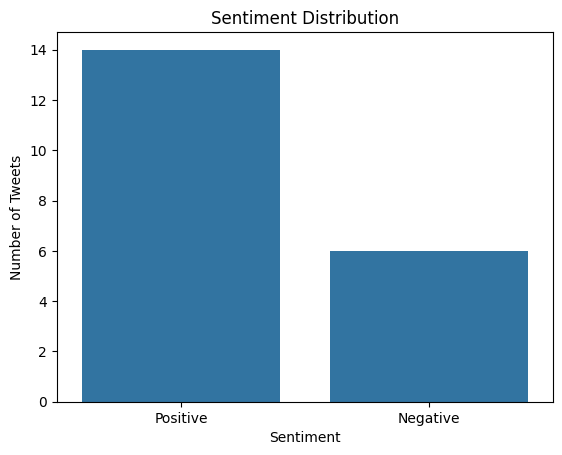

In [116]:
# Sentiment Distribution
sentiment_counts = df_clean_data['Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [117]:
def sentiment_dist(df):
    sentiment_counts = df['Sentiment'].value_counts()
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Tweets')
    plt.show()

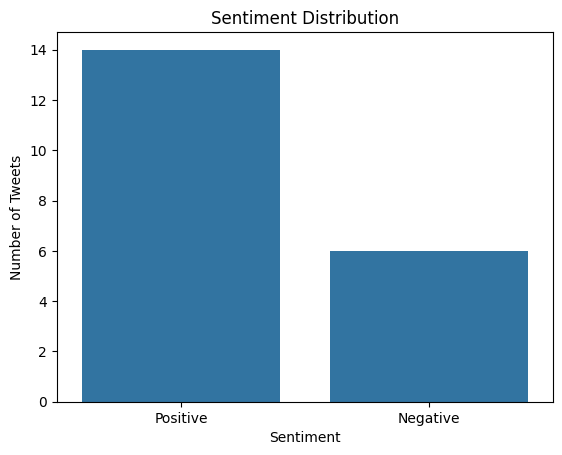

In [118]:
sentiment_dist(df_clean_data)

In [119]:
def format_data_model_output(df):
    df_clean_data = df.copy()
    if 'Unnamed: 0' in df_clean_data.columns:
        df_clean_data = df_clean_data.drop('Unnamed: 0', axis=1)
    df_clean_data['Date'] = pd.to_datetime(df_clean_data['Date'])
    df_clean_data['Year'] = df_clean_data['Date'].dt.year
    df_clean_data['Month'] = df_clean_data['Date'].dt.month
    df_clean_data['Week'] = df_clean_data['Date'].dt.isocalendar().week #VER SI SE DEJA
    df_clean_data['Date'] = df_clean_data['Date'].dt.date
    df_clean_data['Words_count'] = df_clean_data['Tweet'].str.split().apply(len)
    return df_clean_data

def obtain_summary(df):
    frecuency_dates = df['Date'].value_counts()
    df_results = pd.DataFrame(frecuency_dates).reset_index()
    df_results.columns = ['Date', 'Tweets_count']
    average_word_counts = []
    positive_ratio = []
    for date in df_results['Date']:
        # Filtrar df por fecha 
        filtered_tweets = df[df['Date'] == date]
        # suma y conteo de words_count
        total_words = filtered_tweets['Words_count'].sum()      # sumo los totales
        count_tweets = filtered_tweets['Words_count'].count()   # cuento por fecha
        average = total_words / count_tweets if count_tweets > 0 else 0  
        average_word_counts.append(average)
        # Positives count
        total_positives = (filtered_tweets['Sentiment']=='Positive').sum()  
        count_tweets = filtered_tweets['Sentiment'].count()  # total rows
        ratio = total_positives / count_tweets 
        positive_ratio.append(ratio)
    df_results['Average_word_count'] = average_word_counts
    df_results['Positive_ratio'] = positive_ratio
    summary = df_results.copy()
    return summary

In [120]:
fecha_ver = pd.to_datetime('30-03-2024')
print(fecha_ver.isocalendar().week)
aux_01 = format_data_model_output(df_clean_data)
aux_01.head()

13


C:\Program Files\KMSpico\temp\ipykernel_10472\2527136911.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fecha_ver = pd.to_datetime('30-03-2024')
C:\Program Files\KMSpico\temp\ipykernel_10472\1869311467.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean_data['Date'] = pd.to_datetime(df_clean_data['Date'])


,Date,Tweet,Tweet_Likes,Sentiment,Year,Month,Week,Words_count
0,2024-10-15,Milan Marseille Montpellier\n\nLive Code\n\n▬A...,0,Positive,2024,10,42,8
1,2024-10-15,@resul_fcb Messi 🍇d me when I was 14,0,Positive,2024,10,42,8
2,2024-10-15,"@cervovski Sorry, but Vlady was a wimp. Now, g...",0,Negative,2024,10,42,28
3,2024-10-15,@Mariapilar1397 You're going to have him for 7...,0,Negative,2024,10,42,32
4,2024-10-15,@ActuFoot_ Messi and Neymar were so right,0,Negative,2024,10,42,7


In [121]:
def obtain_summary(df):
    frecuency_dates = df['Date'].value_counts()
    print(frecuency_dates)
    df_results = pd.DataFrame(frecuency_dates).reset_index()
    df_results.columns = ['Date', 'Tweets_count']
    average_word_counts = []
    positive_ratio = []
    for date in df_results['Date']:
        # Filtrar df por fecha 
        filtered_tweets = df[df['Date'] == date]
        # suma y conteo de words_count
        total_words = filtered_tweets['Words_count'].sum()      # sumo los totales
        count_tweets = filtered_tweets['Words_count'].count()   # cuento por fecha
        average = total_words / count_tweets if count_tweets > 0 else 0  
        average_word_counts.append(average)
        # Positives count
        total_positives = (filtered_tweets['Sentiment']=='Positive').sum()  
        count_tweets = filtered_tweets['Sentiment'].count()  # total rows
        ratio = total_positives / count_tweets 
        positive_ratio.append(ratio)
    df_results['Average_word_count'] = average_word_counts
    df_results['Positive_ratio'] = positive_ratio
    summary = df_results.copy()
    return summary

In [122]:
aux_02 = obtain_summary(aux_01)
aux_02

Date
2024-10-15    20
Name: count, dtype: int64


,Date,Tweets_count,Average_word_count,Positive_ratio
0,2024-10-15,20,19.35,0.7


In [123]:
def likes_over_words_amount(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(aux_01['Words_count'], aux_01['Tweet_Likes'], alpha=0.5, color='green')
    plt.title('Relación entre Palabras en Tweets y Likes')
    plt.xlabel('Cantidad de Palabras en Tweet')
    plt.ylabel('Cantidad de Likes')
    plt.show()


In [124]:
para_eda = pd.read_csv(r'export_para_eda.csv')
para_eda.head()

,Unnamed: 0,Date,Tweet,Tweet_Likes
0,0,Wed Oct 16 03:13:44 +0000 2024,Curry faked out LeBron and then threw it down ...,9425
1,1,Wed Oct 16 17:34:58 +0000 2024,LeBron deleted this tweet.. 😳 https://t.co/iqu...,91
2,2,Wed Oct 09 22:28:21 +0000 2024,**LeBron James grilling his team on the bench ...,80295
3,3,Sat Oct 12 19:23:02 +0000 2024,What’s missing 😭 https://t.co/4qI52D8uFC,14829
4,4,Wed Oct 16 00:09:55 +0000 2024,Telling my kids about 39 yo LeBron’s defensive...,6253


In [125]:
def preprocess_tweet(df):
    df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))  # delete URLs
    df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'@\w+', '', x))  # delete mentions
    #df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'#\w+', '', x))  # delete hashtags
    return df


In [126]:
preprocess_tweet(para_eda)

,Unnamed: 0,Date,Tweet,Tweet_Likes
0,0,Wed Oct 16 03:13:44 +0000 2024,Curry faked out LeBron and then threw it down ...,9425
1,1,Wed Oct 16 17:34:58 +0000 2024,LeBron deleted this tweet.. 😳,91
2,2,Wed Oct 09 22:28:21 +0000 2024,**LeBron James grilling his team on the bench ...,80295
3,3,Sat Oct 12 19:23:02 +0000 2024,What’s missing 😭,14829
4,4,Wed Oct 16 00:09:55 +0000 2024,Telling my kids about 39 yo LeBron’s defensive...,6253


In [127]:
def preprocess_tweet_v2(df):
    df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))  # delete URLs
    df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'@\w+', '', x))  # delete mentions
    #df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'#\w+', '', x))  # delete hashtags
    df_clean_data = df.copy()
    return df_clean_data

In [128]:
preprocess_tweet_v2(df_clean_data)
df_clean_data

,Unnamed: 0,Date,Tweet,Tweet_Likes,Sentiment
0,0,Tue Oct 15 17:33:20 +0000 2024,Milan Marseille Montpellier\n\nLive Code\n\n▬A...,0,Positive
1,1,Tue Oct 15 17:33:19 +0000 2024,Messi 🍇d me when I was 14,0,Positive
2,2,Tue Oct 15 17:33:19 +0000 2024,"Sorry, but Vlady was a wimp. Now, given the s...",0,Negative
3,3,Tue Oct 15 17:33:19 +0000 2024,"You're going to have him for 7 more years, Ma...",0,Negative
4,4,Tue Oct 15 17:33:18 +0000 2024,Messi and Neymar were so right,0,Negative
5,5,Tue Oct 15 17:33:16 +0000 2024,It's incredible how anti-Messi still exists in...,0,Negative
6,6,Tue Oct 15 17:33:15 +0000 2024,Also scored a bunch of goals and a hattrick...,0,Positive
7,7,Tue Oct 15 17:33:14 +0000 2024,Lionel Messi excitedly presents his first frag...,0,Positive
8,8,Tue Oct 15 17:33:14 +0000 2024,"Dude, Argentina and Brazil beat each other a...",0,Positive
9,9,Tue Oct 15 17:33:12 +0000 2024,Haaland was more decisive that year than Mes...,0,Positive


In [129]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import streamlit as st

# Modulo para generar la nube de palabras
def plot_wordcloud(df, keyword):
    if 'Tweet' not in df.columns or 'Sentiment' not in df.columns:
        st.error("The Dataframe's structure is not correct.")
        return
    
    # Elimina la palabra clave de los tweets
    def remove_keyword(text, keyword):
        pattern = re.compile(re.escape(keyword), re.IGNORECASE)
        return pattern.sub('', text)

    # Filtra las palabras positivas y negativas
    positive_words = " ".join(df['Tweet'][df['Sentiment'] == 'Positive'])
    negative_words = " ".join(df['Tweet'][df['Sentiment'] == 'Negative'])
    
    # Elimina la palabra clave ingresada por el usuario de los textos
    positive_words = remove_keyword(positive_words, keyword)
    negative_words = remove_keyword(negative_words, keyword)

    # Genera las nubes de palabras
    wordcloud = WordCloud(width=875, height=900, background_color="lightgrey", max_words=50, min_font_size=20, random_state=42)\
        .generate(positive_words)
    
    wordcloud2 = WordCloud(width=875, height=900, background_color="black", max_words=50, min_font_size=20, random_state=42)\
        .generate(negative_words)

    # Crea los gráficos para ambas nubes de palabras
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 9), facecolor=None)
    ax1.imshow(wordcloud, interpolation='bilinear')
    ax2.imshow(wordcloud2, interpolation='bilinear')
    ax1.set_title('Positive Tweets', fontsize=20)
    ax2.set_title('Negative Tweets', fontsize=20)
    ax1.axis("off")
    ax2.axis("off")
    fig.tight_layout()
    
    # Muestra el gráfico en Streamlit
    st.pyplot(fig)

# En tu código principal de Streamlit
keyword = st.text_input("Enter a keyword to search tweets:", "Lebron")



2024-10-17 19:10:13.049 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-17 19:10:13.054 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-17 19:10:13.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-17 19:10:13.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-17 19:10:13.069 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [130]:
aux_01.head()

,Date,Tweet,Tweet_Likes,Sentiment,Year,Month,Week,Words_count
0,2024-10-15,Milan Marseille Montpellier\n\nLive Code\n\n▬A...,0,Positive,2024,10,42,8
1,2024-10-15,@resul_fcb Messi 🍇d me when I was 14,0,Positive,2024,10,42,8
2,2024-10-15,"@cervovski Sorry, but Vlady was a wimp. Now, g...",0,Negative,2024,10,42,28
3,2024-10-15,@Mariapilar1397 You're going to have him for 7...,0,Negative,2024,10,42,32
4,2024-10-15,@ActuFoot_ Messi and Neymar were so right,0,Negative,2024,10,42,7


In [131]:
# dash.py

import matplotlib.pyplot as plt
import seaborn as sns

def sentiment_dist(df):
    if 'Tweet' not in df.columns or 'Sentiment' not in df.columns:
        raise ValueError("The DataFrame's structure is not correct.")

    # Cuento la cantidad de sentimientos
    sentiment_counts = df['Sentiment'].value_counts()

    # Configuraciones del gráfico
    fig, ax = plt.subplots(figsize=(7, 5), facecolor='white')

    # Colores personalizados
    colors = ['#4CAF50' if sentiment == 'Positive' else '#F44336' for sentiment in sentiment_counts.index]

    # Gráfico tipo dona
    wedges, texts, autotexts = ax.pie(sentiment_counts, 
                                      labels=sentiment_counts.index, 
                                      autopct='%1.1f%%', 
                                      startangle=90, 
                                      colors=colors, 
                                      wedgeprops=dict(width=0.4, edgecolor='white'),
                                      pctdistance=0.8)

    # Personalización avanzada del texto
    for text in texts:
        text.set_fontsize(14)
        text.set_color('grey')
    for autotext in autotexts:
        autotext.set_fontsize(14)
        autotext.set_color('black')
        autotext.set_weight('bold')

    # Borde del gráfico de dona
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

    # Título del gráfico
    plt.title('Sentiment Distribution of Tweets', fontsize=20, color='darkblue')

    # Aspecto más equilibrado del gráfico de dona
    ax.axis('equal')

    return fig


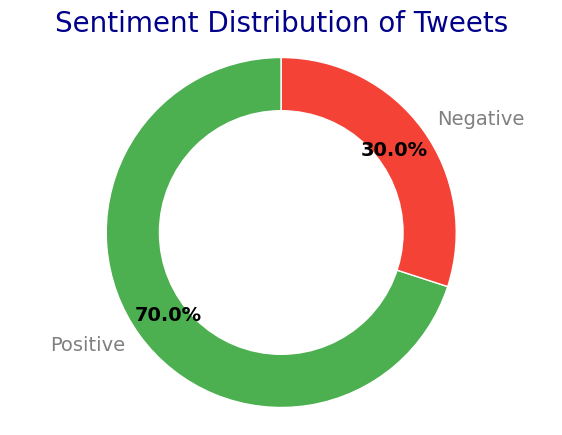

In [132]:
sentiment_dist(aux_01)

In [139]:
import plotly.express as px

def sentiment_dist_plotly(df):
    if 'Tweet' not in df.columns or 'Sentiment' not in df.columns:
        raise ValueError("The DataFrame's structure is not correct.")
    
    # Conteo de los valores de Sentiment
    sentiment_counts = df['Sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['Sentiment', 'Count']

    # Crear un gráfico de barras interactivo con Plotly
    fig = px.bar(sentiment_counts, 
                 x='Sentiment', 
                 y='Count', 
                 color='Sentiment', 
                 color_discrete_map={'Positive':'#2ECC71', 'Negative':'#E74C3C'},
                 title="Distribución de Sentimientos en Tweets",
                 labels={'Sentiment': 'Sentimiento', 'Count': 'Número de Tweets'},
                 text='Count',
                 height=500)

    # Actualizar el diseño del gráfico para una mejor presentación
    fig.update_traces(textposition='outside', marker_line_width=2, marker_line_color='black')
    fig.update_layout(
        title_font_size=24,
        title_x=0.5,
        xaxis_title_font_size=18,
        yaxis_title_font_size=18,
        font=dict(family="Arial", size=14),
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='lightgrey')
    )
    
    # Mostrar el gráfico en Streamlit
    st.plotly_chart(fig, use_container_width=True)


In [138]:
sentiment_dist_plotly(aux_01)

In [142]:
import plotly.graph_objects as go
import streamlit as st

# Function to create a banner with 5 tablets
def create_banner(aux_02):
    # Extract relevant columns from the dataframe
    dates = aux_02['Date'].tolist()
    tweet_counts = aux_02['Tweets_count'].tolist()
    avg_word_counts = aux_02['Average_word_count'].tolist()
    positive_ratios = aux_02['Positive_ratio'].tolist()
    
    # Create 5 tablets for each metric
    fig = go.Figure()

    # 1. Tablet for Date
    fig.add_trace(go.Indicator(
        mode="number",
        value=len(dates),
        title={"text": "Dates Captured"},
        domain={'row': 0, 'column': 0},
        number={"suffix": f" Dates"}
    ))

    # 2. Tablet for Total Tweets Count
    fig.add_trace(go.Indicator(
        mode="number",
        value=sum(tweet_counts),
        title={"text": "Total Tweets"},
        domain={'row': 0, 'column': 1},
        number={"suffix": f" Tweets"}
    ))

    # 3. Tablet for Average Word Count
    avg_word_count_overall = sum(avg_word_counts) / len(avg_word_counts)
    fig.add_trace(go.Indicator(
        mode="number",
        value=avg_word_count_overall,
        title={"text": "Average Word Count"},
        domain={'row': 0, 'column': 2},
        number={"suffix": " Words"}
    ))

    # 4. Tablet for Maximum Positive Ratio
    max_positive_ratio = max(positive_ratios)
    fig.add_trace(go.Indicator(
        mode="number",
        value=max_positive_ratio,
        title={"text": "Max Positive Ratio"},
        domain={'row': 0, 'column': 3},
        number={"suffix": " %"}
    ))

    # 5. Tablet for Average Positive Ratio
    avg_positive_ratio = sum(positive_ratios) / len(positive_ratios)
    fig.add_trace(go.Indicator(
        mode="number",
        value=avg_positive_ratio,
        title={"text": "Average Positive Ratio"},
        domain={'row': 0, 'column': 4},
        number={"suffix": " %"}
    ))

    # Customize layout for better appearance
    fig.update_layout(
        grid={'rows': 1, 'columns': 5, 'pattern': "independent"},
        template='plotly_dark',  # Professional theme
        height=200,  # Height of the banner
        margin=dict(l=20, r=20, t=20, b=20),  # Margins for better space management
    )

    # Display the plot in Streamlit
    st.plotly_chart(fig, use_container_width=True)



In [143]:
# Call the function to display the banner
create_banner(aux_02)


2024-10-17 20:18:49.483 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-17 20:18:49.483 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-17 20:18:49.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
